# ANN & MNIST : exercise
---

## 라이브러리 불러오기

In [87]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [88]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [89]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [90]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


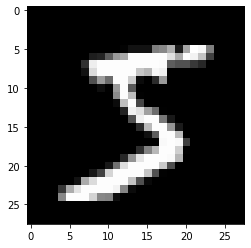

In [91]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [92]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

* min-max scaling

In [93]:
train_x = train_x / train_x.max() 
test_x = test_x / test_x.max() 

* target feature : One-hot Encoding

In [94]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [95]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [96]:
########################
# 모델링 I : .fit( ) 까지!
########################
# clear session
keras.backend.clear_session()
# set model
model = keras.models.Sequential()
# set layers
model.add( keras.layers.Input(shape=784) )
model.add( keras.layers.Dense(10, activation='sigmoid') )
# model compile
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [97]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',#관측대상
                   min_delta=0,#관측여부
                   patience=5,#인내도
                   restore_best_weights=True)#최고성능모델 사용여부

In [98]:
model.fit(train_x,train_y,epochs=50,validation_split=0.2,callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5076 - acc: 0.8683 - val_loss: 0.3236 - val_acc: 0.9119
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3174 - acc: 0.9129 - val_loss: 0.2856 - val_acc: 0.9210
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2934 - acc: 0.9180 - val_loss: 0.2787 - val_acc: 0.9252
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2808 - acc: 0.9210 - val_loss: 0.2708 - val_acc: 0.9252
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2736 - acc: 0.9233 - val_loss: 0.2672 - val_acc: 0.9269
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2678 - acc: 0.9249 - val_loss: 0.2715 - val_acc: 0.9255
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2638 - acc: 0.9263 - val_loss: 0.2650 - val_acc: 0.9287
Epoch 8/50
1500/1500 [==============================] - 4s 3ms

In [99]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 93.27%
테스트 정확도 : 92.70%


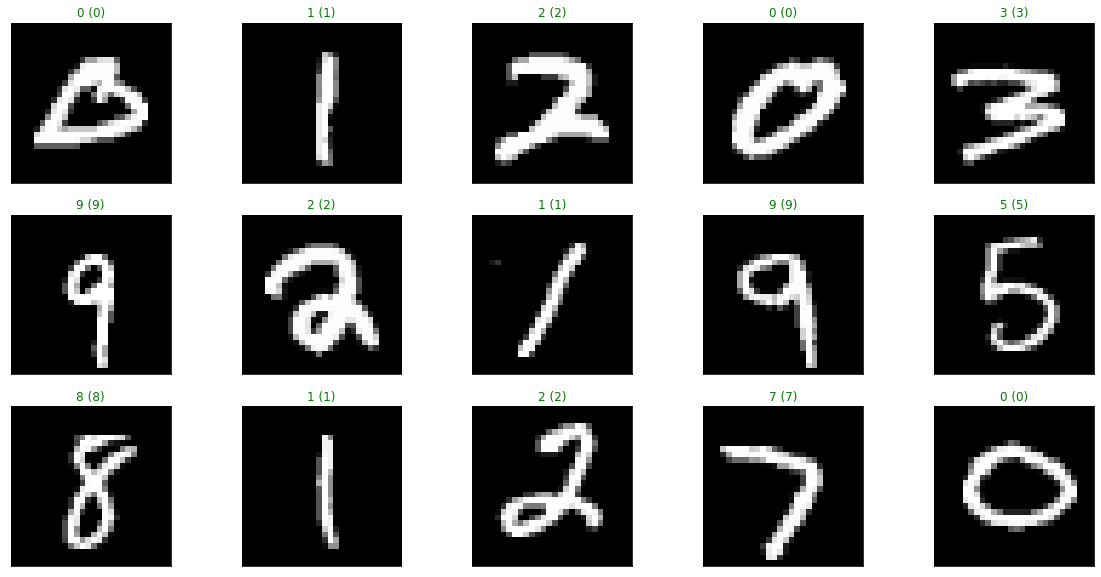

In [101]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [113]:
########################
# 모델링 I : .fit( ) 까지!
########################
# clear session
keras.backend.clear_session()
# set model
model = keras.models.Sequential()
# set layers
model.add( keras.layers.Input(shape=(28,28) ))
model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(256, activation='relu') )
model.add( keras.layers.Dense(64, activation='relu') )
model.add( keras.layers.Dense(64, activation='relu') )
model.add( keras.layers.Dense(10, activation='sigmoid') )
# model compile
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [114]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
train_x = train_x / train_x.max() 
test_x = test_x / test_x.max() 
model.fit(train_x,train_y,validation_split=0.2,epochs=50,callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2471 - acc: 0.9262 - val_loss: 0.1259 - val_acc: 0.9615
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1020 - acc: 0.9684 - val_loss: 0.0984 - val_acc: 0.9684
Epoch 3/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0704 - acc: 0.9783 - val_loss: 0.0961 - val_acc: 0.9697
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0542 - acc: 0.9830 - val_loss: 0.0902 - val_acc: 0.9722
Epoch 5/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0959 - val_acc: 0.9731
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0351 - acc: 0.9889 - val_loss: 0.1038 - val_acc: 0.9733
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0312 - acc: 0.9893 - val_loss: 0.0843 - val_acc: 0.9774
Epoch 8/50
1500/1500 [==============================] - 10s 

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

In [ ]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)